In [1]:
import pandas as pd 


from bs4 import BeautifulSoup

import regex as re 
import string
import nltk
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install wordcloud

In [3]:
df= pd.read_csv('../DATASET/Google_data')

In [4]:
df.head()

,Unnamed: 0,title,Published_on,News_agency,URL,summary,Country,language,tag
0,0,Alexei Navalny death latest: Putin critic’s ‘b...,"Mon, 19 Feb 2024 00:01:00 GMT",The Independent,https://news.google.com/rss/articles/CBMic2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
1,1,U.S. military reports 1st Houthi unmanned unde...,"Sun, 18 Feb 2024 22:23:17 GMT",CBS News,https://news.google.com/rss/articles/CBMiW2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
2,2,The latest on the Israel-Hamas war: Live updat...,"Sun, 18 Feb 2024 21:21:00 GMT",CNN,https://news.google.com/rss/articles/CBMiV2h0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
3,3,"Russia takes full control of Avdiivka, as Kyiv...","Sun, 18 Feb 2024 16:57:00 GMT",POLITICO Europe,https://news.google.com/rss/articles/CBMiaGh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World
4,4,Brazil's President Angers Israel After Compari...,"Sun, 18 Feb 2024 21:46:16 GMT",The New York Times,https://news.google.com/rss/articles/CBMiWmh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,World


In [5]:
df.sample(5)

,Unnamed: 0,title,Published_on,News_agency,URL,summary,Country,language,tag
2655,2655,Así sería el aspecto real de Frodo Bolsón sigu...,"Sat, 17 Feb 2024 14:20:40 GMT",Alfa Beta Juega,https://news.google.com/rss/articles/CBMiemh0d...,"<a href=""https://news.google.com/rss/articles/...",CA,es,Technology
1465,1465,"Vigils planned for Vernon, Kamloops and Kelown...","Sun, 18 Feb 2024 12:00:00 GMT",Castanet.net,https://news.google.com/rss/articles/CBMiiQFod...,"<ol><li><a href=""https://news.google.com/rss/a...",CA,en,World
380,380,How Jaromir Jagr defined 1990s culture in Pitt...,"Sun, 18 Feb 2024 10:01:16 GMT",The Athletic,https://news.google.com/rss/articles/CBMiXmh0d...,"<ol><li><a href=""https://news.google.com/rss/a...",US,en,Sports
2056,2056,Ingérence chinoise: la Chine et le Canada ne s...,"Sun, 18 Feb 2024 06:10:31 GMT",TVA Nouvelles,https://news.google.com/rss/articles/CBMiZGh0d...,"<a href=""https://news.google.com/rss/articles/...",CA,fr,Nation
2339,2339,La révolution quantique s'attaque aux batterie...,"Sat, 17 Feb 2024 09:00:00 GMT",Sciences et Avenir,https://news.google.com/rss/articles/CBMibGh0d...,"<a href=""https://news.google.com/rss/articles/...",CA,fr,Science


In [6]:
df.shape

(2962, 9)

In [7]:
df['summary'][0]

'<ol><li><a href="https://news.google.com/rss/articles/CBMic2h0dHBzOi8vd3d3LmluZGVwZW5kZW50LmNvLnVrL25ld3Mvd29ybGQvZXVyb3BlL2FsZXhlaS1uYXZhbG55LWJvZHktbWlzc2luZy1kZWF0aC1ydXNzaWEtcHV0aW4tcHJpc29uLWIyNDk4MTU2Lmh0bWzSAQA?oc=5" target="_blank">Alexei Navalny death latest: Putin critic’s ‘bruised body seen in morgue’ as family demands it is returned</a>&nbsp;&nbsp;<font color="#6f6f6f">The Independent</font></li><li><a href="https://news.google.com/rss/articles/CBMid2h0dHBzOi8vd3d3LmZveG5ld3MuY29tL3dvcmxkL25hdmFsbnlzLWJvZHktcmVwb3J0ZWRseS1mb3VuZC1zaWducy1icnVpc2luZy1ydXNzaWEtY2xhaW1zLWhlLWRpZWQtc3VkZGVuLWRlYXRoLXN5bmRyb21l0gF7aHR0cHM6Ly93d3cuZm94bmV3cy5jb20vd29ybGQvbmF2YWxueXMtYm9keS1yZXBvcnRlZGx5LWZvdW5kLXNpZ25zLWJydWlzaW5nLXJ1c3NpYS1jbGFpbXMtaGUtZGllZC1zdWRkZW4tZGVhdGgtc3luZHJvbWUuYW1w?oc=5" target="_blank">Navalny\'s body reportedly found with \'signs of bruising\' as Russia claims he died of \'sudden death syndrome\'</a>&nbsp;&nbsp;<font color="#6f6f6f">Fox News</font></li><li><a href=

# Checking for Null Values

In [8]:
df.isna().mean() #checking percentage of null values 

Unnamed: 0      0.0
title           0.0
Published_on    0.0
News_agency     0.0
URL             0.0
summary         0.0
Country         0.0
language        0.0
tag             0.0
dtype: float64

In [9]:
df.columns

Index(['Unnamed: 0', 'title', 'Published_on', 'News_agency', 'URL', 'summary',
       'Country', 'language', 'tag'],
      dtype='object')

# Checking for class imbalance

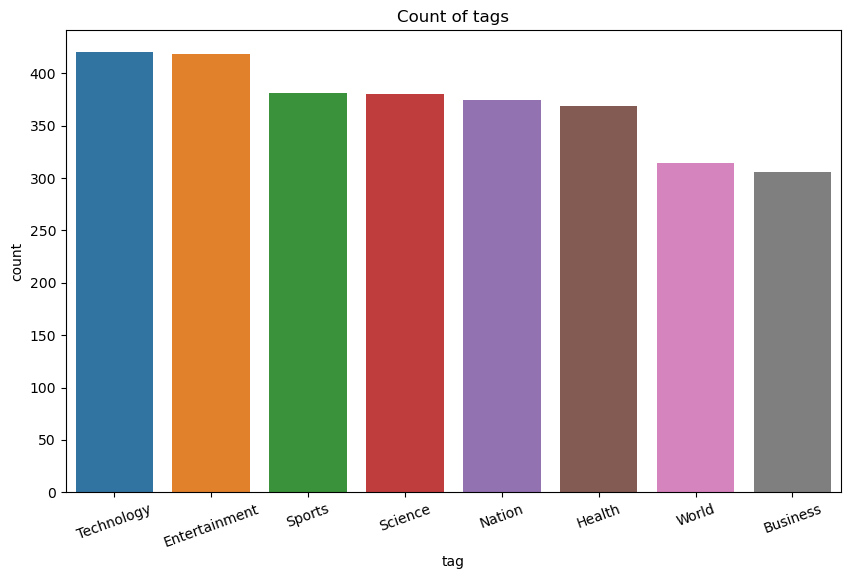

In [10]:
#using a countplot to see the distribution of tags
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='tag',order=df['tag'].value_counts().index)
plt.xticks(rotation=20)
plt.title('Count of tags')
plt.show()

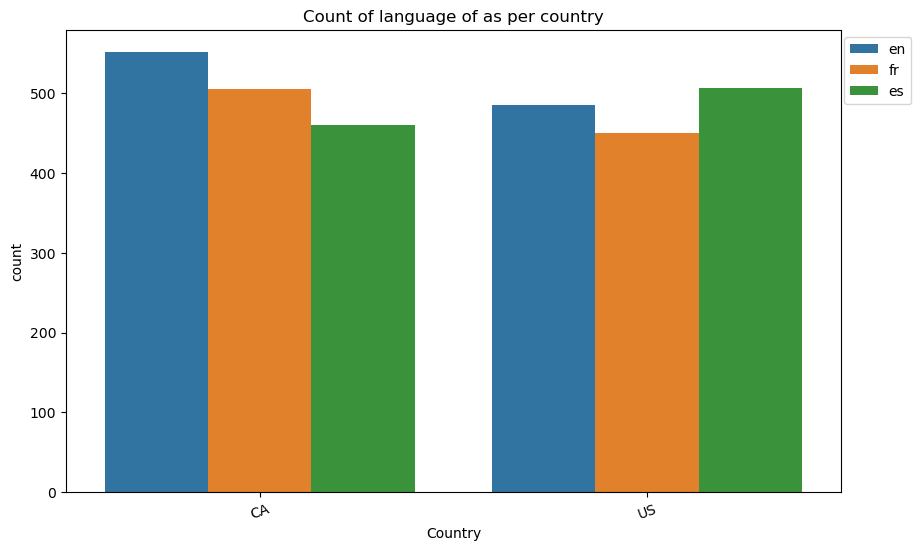

In [11]:
#using a countplot to get language of each country
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Country',order=df['Country'].value_counts().index,hue='language')
plt.xticks(rotation=20)
plt.legend(loc=1,bbox_to_anchor=(1.1,1))
plt.title('Count of language of as per country')
plt.show()

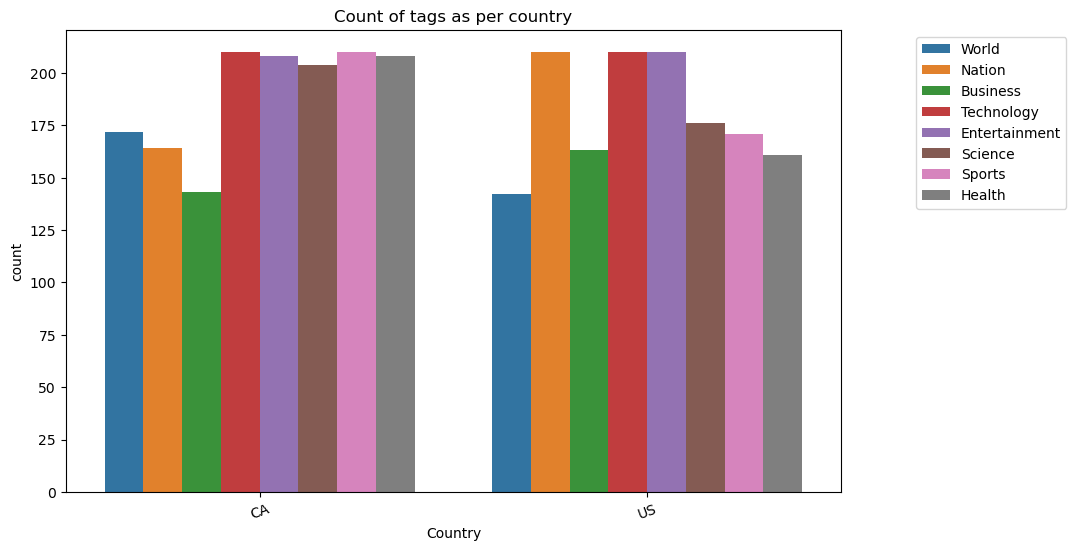

In [12]:
#using a countplot to get count of tags as per country
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Country',order=df['Country'].value_counts().index,hue='tag')
plt.xticks(rotation=20)
plt.title('Count of tags as per country')
plt.legend(loc=1,bbox_to_anchor=(1.3,1))
plt.show()

<Axes: ylabel='tag'>

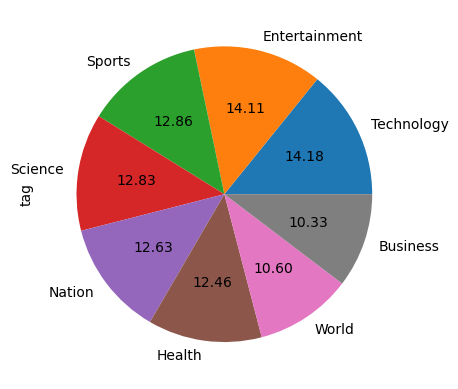

In [13]:
df['tag'].value_counts().plot(kind='pie',autopct='%.2f')

# Remove HTML content

In [14]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return re.sub(r'(\xa0)', '', soup.get_text())

df['summary'] = df['summary'].apply(strip_html)
df['summary'][1]

"U.S. military reports 1st Houthi unmanned underwater vessel in Red SeaCBS NewsNavy counters Houthi Red Sea attacks in its first major battle at sea of the 21st centuryCBS NewsWhat it's like aboard a US warship on the frontlines of the Red Sea fight: Reporter's notebookABC NewsUS launches 5 airstrikes against Houthi anti-ship missiles, destroys underwater droneFox NewsOne U.S. Navy secret weapon in the Red Sea? Sailor moraleCBS News"

# Understanding Data

In [15]:
df['tag'].value_counts()

Technology       420
Entertainment    418
Sports           381
Science          380
Nation           374
Health           369
World            314
Business         306
Name: tag, dtype: int64

In [16]:
df['Country'].value_counts()

CA    1519
US    1443
Name: Country, dtype: int64

In [17]:
df['News_agency'].value_counts()

La Presse                 87
CNN en Español            59
infobae                   58
Le Journal de Montréal    49
La Patilla                47
                          ..
Elysee.fr                  1
Africanews Français        1
Marianne                   1
Terre-net                  1
El Economista              1
Name: News_agency, Length: 866, dtype: int64

In [18]:
df['language'].value_counts()

en    1038
es     968
fr     956
Name: language, dtype: int64

# Merging Summary and Title

In [19]:
df['Merged'] = df['title'] + ' - ' + df['summary']

In [20]:
df['Merged'][0]

"Alexei Navalny death latest: Putin critic’s ‘bruised body seen in morgue’ as family demands it is returned - The Independent - Alexei Navalny death latest: Putin critic’s ‘bruised body seen in morgue’ as family demands it is returnedThe IndependentNavalny's body reportedly found with 'signs of bruising' as Russia claims he died of 'sudden death syndrome'Fox NewsUkrainian official: Navalny’s death shows ‘Putin is the ultimate evil’The HillOpinion: One man who stood up to a dictatorshipCNNA Stunned Russian Opposition in Exile Considers a Future Without NavalnyThe New York Times"

# Convert to lowercase

In [21]:
df['Merged'] = df['Merged'].apply(lambda x: x.lower())
df['Merged'][0]

"alexei navalny death latest: putin critic’s ‘bruised body seen in morgue’ as family demands it is returned - the independent - alexei navalny death latest: putin critic’s ‘bruised body seen in morgue’ as family demands it is returnedthe independentnavalny's body reportedly found with 'signs of bruising' as russia claims he died of 'sudden death syndrome'fox newsukrainian official: navalny’s death shows ‘putin is the ultimate evil’the hillopinion: one man who stood up to a dictatorshipcnna stunned russian opposition in exile considers a future without navalnythe new york times"

# Remove Punctuation


In [22]:
def punctuation_removal(text):
    sp = string.punctuation
    sp.join('“”’')
    for p in sp:
        text = text.replace(p, "")
    return text

df['Merged'] = df['Merged'].apply(punctuation_removal)
df['Merged'][0]

'alexei navalny death latest putin critic’s ‘bruised body seen in morgue’ as family demands it is returned  the independent  alexei navalny death latest putin critic’s ‘bruised body seen in morgue’ as family demands it is returnedthe independentnavalnys body reportedly found with signs of bruising as russia claims he died of sudden death syndromefox newsukrainian official navalny’s death shows ‘putin is the ultimate evil’the hillopinion one man who stood up to a dictatorshipcnna stunned russian opposition in exile considers a future without navalnythe new york times'

# Tokenisation 

In [23]:
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens


df['Merged'] = df['Merged'].apply(tokenization)


In [24]:
df[['Merged']]

,Merged
0,"[alexei, navalny, death, latest, putin, critic..."
1,"[us, military, reports, 1st, houthi, unmanned,..."
2,"[the, latest, on, the, israelhamas, war, live,..."
3,"[russia, takes, full, control, of, avdiivka, a..."
4,"[brazils, president, angers, israel, after, co..."
...,...
2957,"[residentes, de, medicina, ganan, concurso, de..."
2958,"[realiza, imss, obras, de, prestaciones, socia..."
2959,"[medicina, amplía, sus, edificios, y, proyecta..."
2960,"[la, raza, 70, años, como, pionero, en, medici..."


# Remove Stopwords

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
i=0
def remove_stopwords(text):
    output = []
    for w in text:
        if w not in stopwords and len(w)>4:
            output.append(w)
    return output

df['Merged'] = df['Merged'].apply(remove_stopwords)


In [26]:
df[['Merged']]

,Merged
0,"[alexei, navalny, death, latest, putin, critic..."
1,"[military, reports, houthi, unmanned, underwat..."
2,"[latest, israelhamas, updates, latest, israelh..."
3,"[russia, takes, control, avdiivka, decries, ar..."
4,"[brazils, president, angers, israel, comparing..."
...,...
2957,"[residentes, medicina, ganan, concurso, trivia..."
2958,"[realiza, obras, prestaciones, sociales, impul..."
2959,"[medicina, amplía, edificios, proyecta, anexo,..."
2960,"[pionero, medicina, vanguardia, méxico, pioner..."


# Lemmatize the words

In [27]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text

df['Merged'] = df['Merged'].apply(lemmatizer)


In [28]:
df[['Merged']][:5]

,Merged
0,alexei navalny death latest putin critic bruis...
1,military report houthi unmanned underwater ves...
2,latest israelhamas update latest israelhamas u...
3,russia take control avdiivka decries artificia...
4,brazil president anger israel comparing holoca...


# WordCloud

In [29]:
from wordcloud import WordCloud


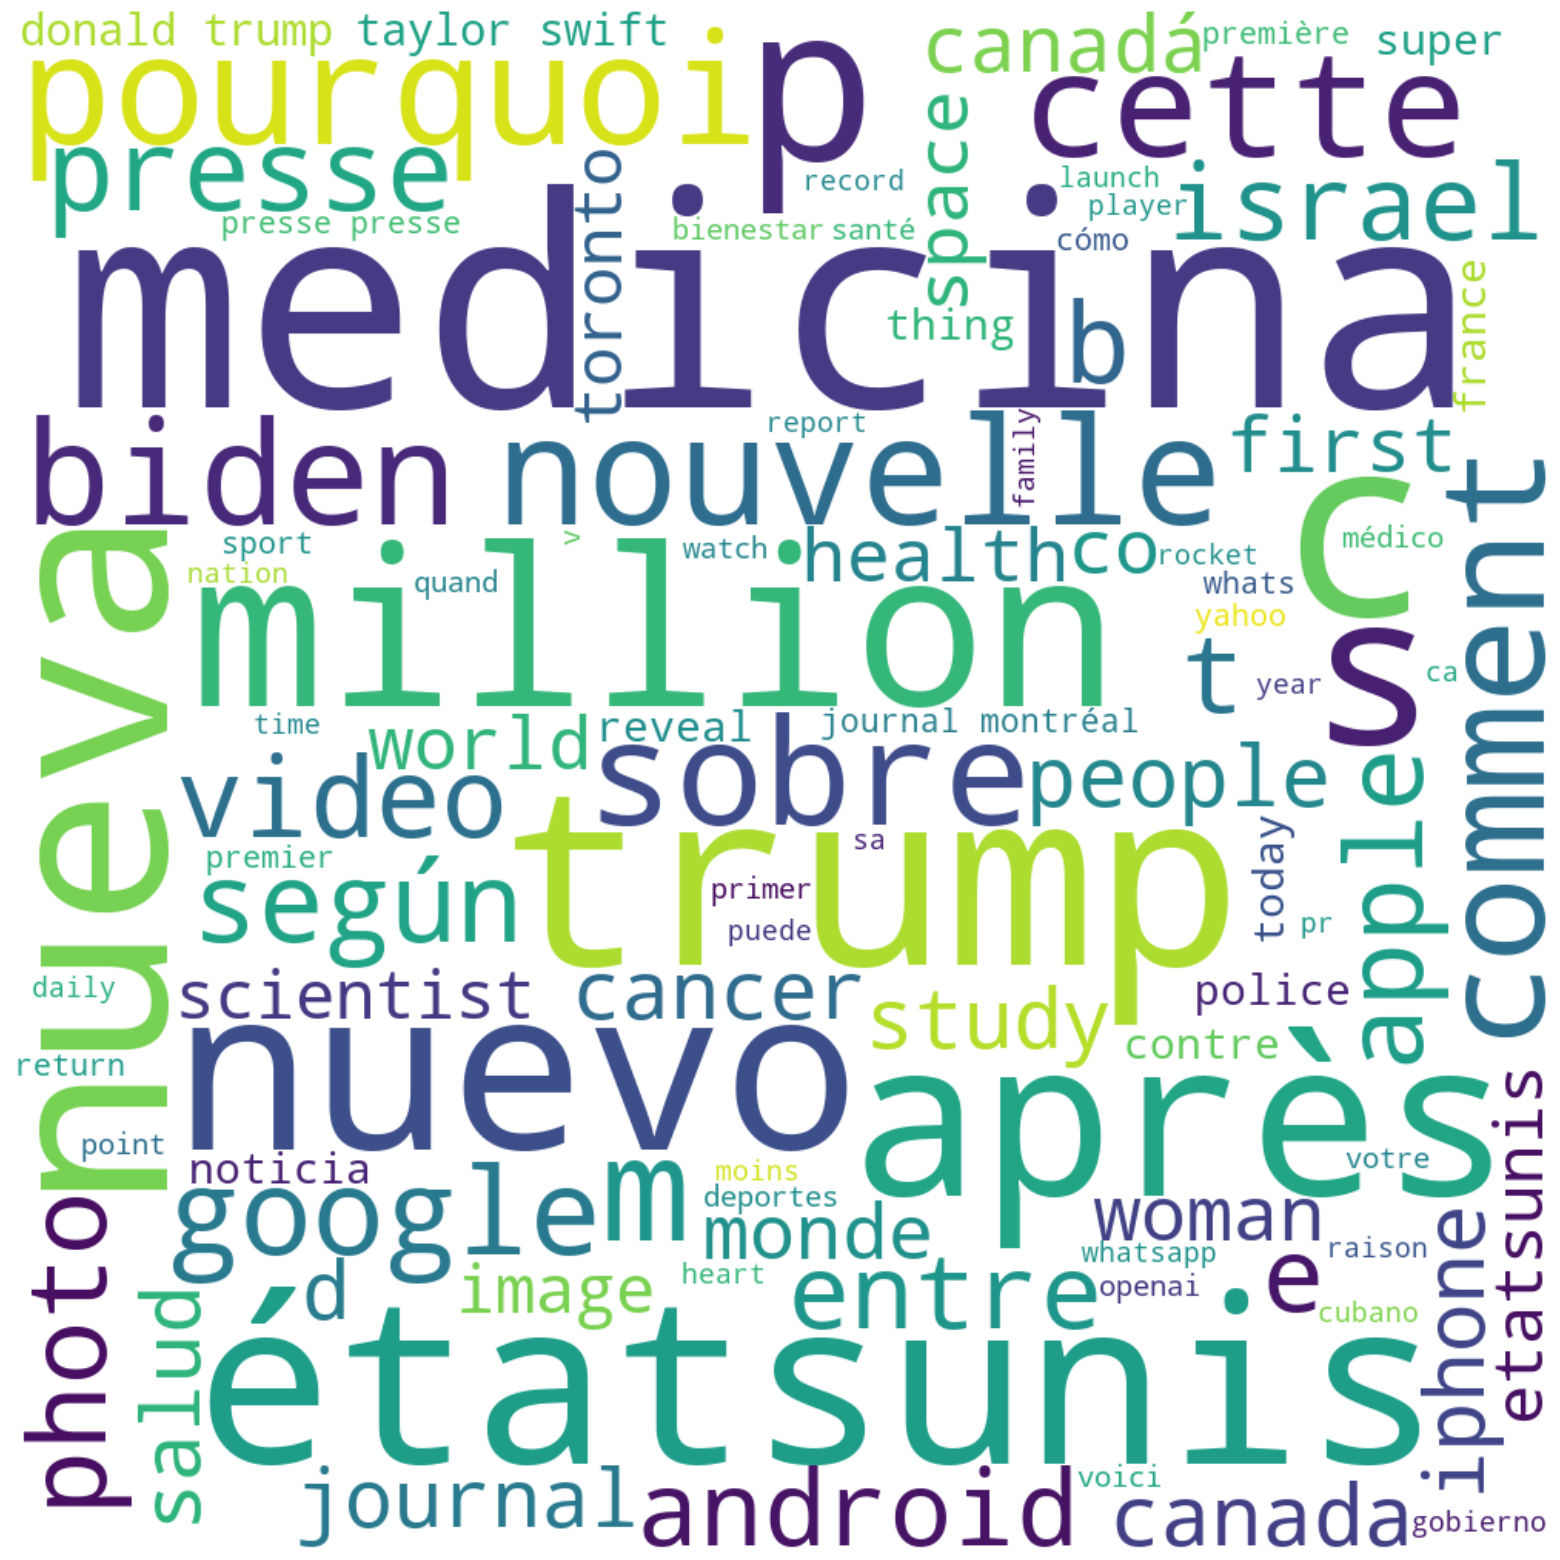

In [33]:
# Generate a word cloud image
text= df['Merged'].to_string()

plt.figure(figsize = (20,20))

wordcloud = WordCloud(max_words = 100 , width = 1000 , height = 1000 , background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

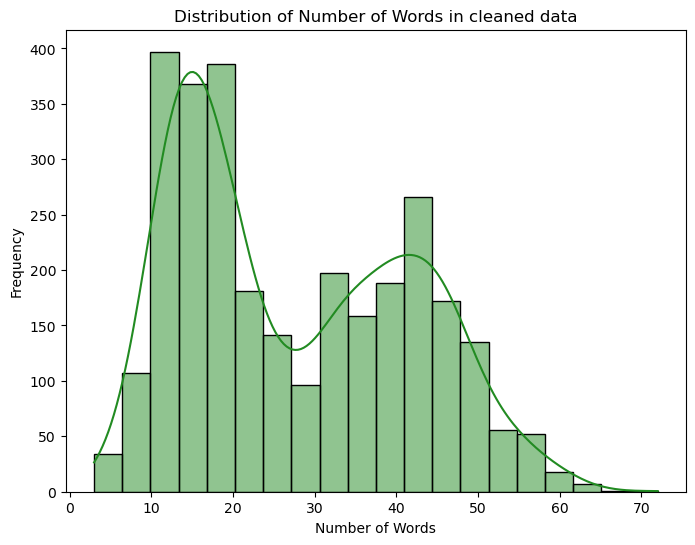

In [31]:
# showing the frequency distribution of words
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Merged'].apply(lambda x: len(x.split())), bins=20, kde=True, color='forestgreen')
plt.title('Distribution of Number of Words in cleaned data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Save Preprocessed data 

In [32]:
df.to_csv("../DATASET/PreprocessedData.csv", index=False)